In [133]:
# 라이브러리 불러오기

import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

# 도화지 만들기

img1 = cv2.imread("img/1693746.png")
img1 = cv2.resize(img1, (500, 300))

img_fg = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img2 = np.full((450, 700, 3), (250, 100, 50), np.uint8)

#마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)

_, mask2 = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY) # BGRA라 겹이 4개
mask_inv = cv2.bitwise_not(mask2)

#합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2) # 너비와 높이의 중간 좌표 지정

#seamlessClone 으로 합성 
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE) # 합성 시 자연스럽게 보이도록 함

#open cv logo 삽입
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = mixed[30:30+h, 570:570+w]
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask2)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
added = masked_fg + masked_bg
mixed[30:30+h, 570:570+w] = added

# Text 삽입
mixed = cv2.putText(mixed, 'Kyunghee Lee', (45, 125), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 255))
mixed = cv2.putText(mixed, 'Engineer', (50, 170), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255))
mixed = cv2.putText(mixed, 'M : +82 10-4015-8855', (50, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
mixed = cv2.putText(mixed, 'E : leekh090163@gmail.com', (50, 330), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
mixed = cv2.putText(mixed, 'W : https://github.com/WinterBlue16', (50, 370), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))

#결과 출력
# plt.axis('off')
# plt.imshow(cv2.cvtColor(mixed, cv2.COLOR_BGR2RGB))
# plt.show()

cv2.imwrite("business card.png", mixed)
#새 창으로 열기
cv2.imshow('mixed', mixed)
cv2.waitKey(0)
cv2.destroyAllWindows()


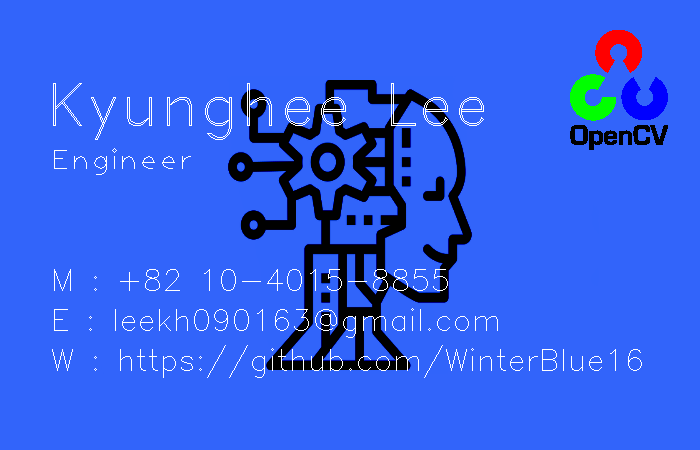